In [1]:
# Run this!
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
print('keras using %s backend'%keras.backend.backend())
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

keras using tensorflow backend


In [2]:
# Here we import the dataset, and split it into the training, validation, and test sets.
from keras.datasets import mnist

# This is our training data, with 6400 samples.
train_X = mnist.load_data()[0][0][:6400].astype('float32')
train_Y = mnist.load_data()[0][1][:6400]

# This is our validation data, with 1600 samples.
valid_X = mnist.load_data()[1][0][:1600].astype('float32')
valid_Y = mnist.load_data()[1][1][:1600]

# This is our test data, with 2000 samples.
test_X = mnist.load_data()[1][0][-2000:].astype('float32')
test_Y = mnist.load_data()[1][1][-2000:]

11493376/11490434 [==============================] - 13s 1us/step


In [3]:
print('train_X:', train_X.shape, end = '')
print(', train_Y:', train_Y.shape)
print('valid_X:', valid_X.shape, end = '')
print(', valid_Y:', valid_Y.shape)
print('test_X:', test_X.shape, end = '')
print(', test_Y:', test_Y.shape)

train_X: (6400, 28, 28), train_Y: (6400,)
valid_X: (1600, 28, 28), valid_Y: (1600,)
test_X: (2000, 28, 28), test_Y: (2000,)


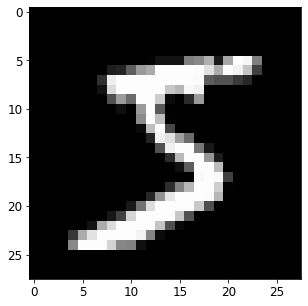

In [4]:
graph.imshow(train_X[0], cmap = 'gray', interpolation = 'nearest')

graph.show()

In [5]:
# First off, let's reshape our X sets so that they fit the convolutional layers.

# This gets the image dimensions - 28
dim = train_X[0].shape[0]

train_X = train_X.reshape(train_X.shape[0], dim, dim, 1)
valid_X = valid_X.reshape(valid_X.shape[0], dim, dim, 1)
test_X = test_X.reshape(test_X.shape[0], dim, dim, 1)

# Next up - feature scaling.
# We scale the values so they are between 0 and 1, instead of 0 and 255.

train_X = train_X / 255
valid_X = valid_X / 255
test_X = test_X / 255

# Now we print the label for the first example
print(train_Y[0])

5


In [6]:
train_Y = keras.utils.to_categorical(train_Y, 10)
valid_Y = keras.utils.to_categorical(valid_Y, 10)
test_Y = keras.utils.to_categorical(test_Y, 10)

# 10 being the number of categories (numbers 0 to 9)

print(train_Y[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# Sets a randomisation seed for replicatability.
np.random.seed(6)

model = Sequential()

In [8]:
model.add(Conv2D(28, kernel_size = (3, 3), activation = 'relu', input_shape = (dim, dim, 1)))
model.add(Conv2D(56, (3, 3), activation = 'relu'))

In [9]:
# Pooling layers help speed up training time and make features it detects more robust.
# They act by downsampling the data - reducing the data size and complexity.

model.add(MaxPooling2D(pool_size = (2, 2)))

# Dropout is a technique to help prevent overfitting
# It makes nodes 'dropout' - turning them off randomly.

model.add(Dropout(0.125))

model.add(Flatten())

In [10]:
# Dense layers perform classification - we have extracted the features with the convolutional pre-processing
model.add(Dense(128, activation='relu'))

# More dropout!
model.add(Dropout(0.25))

# Next is our output layer
# Softmax outputs the probability for each category
model.add(Dense(10, activation=tf.nn.softmax))

# And finally, we compile.
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

### Entrenamiento del modelo

Epoch 1/12
50/50 [==============================] - 10s 194ms/step - loss: 0.0538 - accuracy: 0.9839 - val_loss: 0.1067 - val_accuracy: 0.9644
Epoch 2/12
50/50 [==============================] - 10s 196ms/step - loss: 0.0454 - accuracy: 0.9878 - val_loss: 0.1043 - val_accuracy: 0.9688
Epoch 3/12
50/50 [==============================] - 8s 162ms/step - loss: 0.0404 - accuracy: 0.9887 - val_loss: 0.1046 - val_accuracy: 0.9688
Epoch 4/12
50/50 [==============================] - 10s 208ms/step - loss: 0.0357 - accuracy: 0.9908 - val_loss: 0.1078 - val_accuracy: 0.9669
Epoch 5/12
50/50 [==============================] - 9s 176ms/step - loss: 0.0347 - accuracy: 0.9898 - val_loss: 0.1016 - val_accuracy: 0.9656
Epoch 6/12
50/50 [==============================] - 9s 176ms/step - loss: 0.0262 - accuracy: 0.9922 - val_loss: 0.0939 - val_accuracy: 0.9706
Epoch 7/12
50/50 [==============================] - 9s 185ms/step - loss: 0.0248 - accuracy: 0.9937 - val_loss: 0.1013 - val_accuracy: 0.9688
Epo

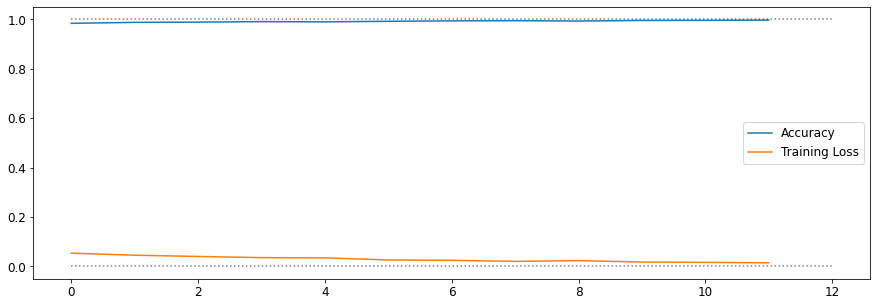

In [12]:
training_stats = model.fit(train_X, train_Y, batch_size = 128, epochs = 12, verbose = 1, validation_data = (valid_X, valid_Y))

evaluation = model.evaluate(test_X, test_Y, verbose=0)

print('Test Set Evaluation: loss = %0.6f, accuracy = %0.2f' %(evaluation[0], 100 * evaluation[1]))

# We can plot our training statistics to see how it developed over time
accuracy, = graph.plot(training_stats.history['accuracy'], label = 'Accuracy')
training_loss, = graph.plot(training_stats.history['loss'], label = 'Training Loss')
graph.legend(handles = [accuracy, training_loss])
loss = np.array(training_stats.history['loss'])
xp = np.linspace(0,loss.shape[0],10 * loss.shape[0])
graph.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
graph.show()

## Predicciones

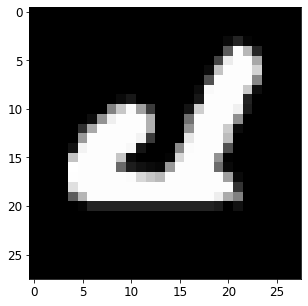

prediction: 4


In [13]:
# ANY NUMBER BETWEEN 0 AND 1999
sample = test_X[0].reshape(dim, dim)

graph.imshow(sample, cmap = 'gray', interpolation = 'nearest')
graph.show()

prediction = model.predict(sample.reshape(1, dim, dim, 1))
print('prediction: %i' %(np.argmax(prediction)))

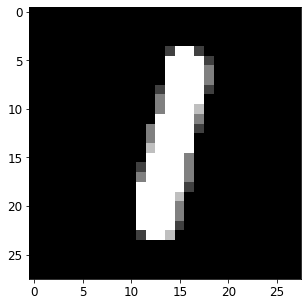

prediction: 1


In [14]:
sample = test_X[100].reshape(dim, dim)

graph.imshow(sample, cmap = 'gray', interpolation = 'nearest')
graph.show()

prediction = model.predict(sample.reshape(1, dim, dim, 1))
print('prediction: %i' %(np.argmax(prediction)))